In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('IPL.csv')
df1.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


# Who are the top 10 batsmen that has the best strike rate that scored more than 1,000 runs?

In [3]:
df2 = df1.drop(['dismissal_kind', 'player_dismissed', 'fielder', 'batting_team', 'bowling_team', 'id'], axis=1)
df2

,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,extras_type
0,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN
1,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN
2,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN
3,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN
4,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN
193464,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN
193465,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,wides
193466,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN


In [4]:
df3 = df2[df2['extras_type'] != 'wides']

In [5]:
batsman_runs = df3[['batsman', 'batsman_runs']]
batsman_runs

,batsman,batsman_runs
0,RT Ponting,1
1,BB McCullum,1
2,BB McCullum,0
3,BB McCullum,1
4,RT Ponting,1
...,...,...
193462,SS Iyer,1
193463,RR Pant,0
193464,RR Pant,1
193466,RR Pant,1


In [6]:
batsman_total_runs = batsman_runs.groupby('batsman').sum().sort_values(by='batsman_runs', ascending=False)
batsman_total_runs

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
...,...
IC Pandey,0
S Kaushik,0
ND Doshi,0


# balls

In [7]:
total_ball_faced = df3.groupby('batsman').count().sort_values(by='ball',ascending=False)
total_ball_faced = total_ball_faced[['ball']]
total_ball_faced

,ball
batsman,
V Kohli,4496
S Dhawan,4096
RG Sharma,4004
SK Raina,3914
DA Warner,3712
...,...
U Kaul,1
JL Denly,1
Shahbaz Ahmed,1


In [8]:
#merge both
batsman_total_runs['ball_faced'] = total_ball_faced['ball']
batsman_total_runs

,batsman_runs,ball_faced
batsman,,
V Kohli,5878,4496
SK Raina,5368,3914
DA Warner,5254,3712
RG Sharma,5230,4004
S Dhawan,5197,4096
...,...,...
IC Pandey,0,2
S Kaushik,0,1
ND Doshi,0,13


# till 1000 runs

In [9]:
final_df = batsman_total_runs.loc[batsman_total_runs['batsman_runs'] >= 1000]
final_df


,batsman_runs,ball_faced
batsman,,
V Kohli,5878,4496
SK Raina,5368,3914
DA Warner,5254,3712
RG Sharma,5230,4004
S Dhawan,5197,4096
...,...,...
LMP Simmons,1079,852
LRPL Taylor,1017,822
M Vohra,1012,768


In [10]:
final_df['strike_rate'] = round((final_df['batsman_runs'] / final_df['ball_faced']) * 100, 2)
final_df

<ipython-input-10-7916b9332df5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['strike_rate'] = round((final_df['batsman_runs'] / final_df['ball_faced']) * 100, 2)


,batsman_runs,ball_faced,strike_rate
batsman,,,
V Kohli,5878,4496,130.74
SK Raina,5368,3914,137.15
DA Warner,5254,3712,141.54
RG Sharma,5230,4004,130.62
S Dhawan,5197,4096,126.88
...,...,...,...
LMP Simmons,1079,852,126.64
LRPL Taylor,1017,822,123.72
M Vohra,1012,768,131.77


In [11]:
res = final_df.sort_values(by='strike_rate', ascending=False)[:10]

In [12]:
res

,batsman_runs,ball_faced,strike_rate
batsman,,,
AD Russell,1517,832,182.33
HH Pandya,1349,847,159.27
V Sehwag,2728,1755,155.44
GJ Maxwell,1505,973,154.68
RR Pant,2079,1368,151.97
AB de Villiers,4849,3192,151.91
CH Gayle,4772,3179,150.11
KA Pollard,3023,2017,149.88
JC Buttler,1714,1146,149.56


In [13]:
from matplotlib import pyplot as plt

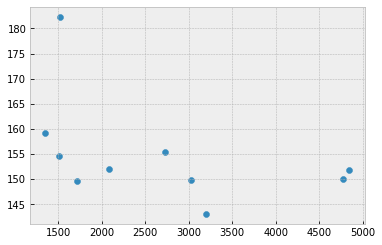

In [14]:
plt.style.use('bmh')
plt.scatter(x=res['batsman_runs'], y=res.strike_rate)

# Q2 answer = 44 batsmen have scored 100 runs or more against a single bowler

In [15]:
batsman_bowler = df1[['batsman', 'bowler', 'batsman_runs']]
batsman_bowler

,batsman,bowler,batsman_runs
0,RT Ponting,AA Noffke,1
1,BB McCullum,AA Noffke,1
2,BB McCullum,Z Khan,0
3,BB McCullum,Z Khan,1
4,RT Ponting,Z Khan,1
...,...,...,...
193463,RR Pant,NM Coulter-Nile,0
193464,RR Pant,NM Coulter-Nile,1
193465,RR Pant,KH Pandya,0
193466,RR Pant,KH Pandya,1


In [16]:
res2 = batsman_bowler.pivot_table(
index=['batsman', 'bowler'],
values='batsman_runs',
aggfunc='sum')
res2 = res2.sort_values(by='batsman_runs', ascending=False)

In [17]:
res2[res2['batsman_runs'] >= 100]


batsman_runs
batsman        bowler                       
SK Raina       PP Chawla                 175
V Kohli        R Ashwin                  160
DA Warner      SP Narine                 158
V Kohli        A Mishra                  158
               DJ Bravo                  151
S Dhawan       Harbhajan Singh           147
RG Sharma      PP Chawla                 146
               UT Yadav                  143
V Kohli        UT Yadav                  141
KA Pollard     A Mishra                  135
SK Raina       Harbhajan Singh           132
RG Sharma      SP Narine                 129
CH Gayle       B Kumar                   129
S Dhawan       DS Kulkarni               127
KA Pollard     DJ Bravo                  125
SR Watson      SL Malinga                125
AB de Villiers SL Malinga                124
DA Warner      P Kumar                   124
V Kohli        RA Jadeja                 123
               PP Chawla                 123
RG Sharma      M Morkel                  119
CH Gayle       PP Chawla                 116
DA Warner      YS Chahal                 116
AM Rahane      PP Chawla                 115
V Kohli        JJ Bumrah                 115
DA Warner      Harbhajan Singh           112
MS Dhoni       DW Steyn                  111
SK Raina       SP Narine                 111
AB de Villiers RA Jadeja                 110
G Gambhir      Z Khan                    109
AB de Villiers Sandeep Sharma            107
RV Uthappa     R Ashwin                  106
SK Raina       Sandeep Sharma            105
KD Karthik     JD Unadkat                104
AB de Villiers Harbhajan Singh           103
CH Gayle       P Kumar                   103
SK Raina       A Mishra                  102
CH Gayle       Harbhajan Singh           102
SR Watson      Sandeep Sharma            102
V Kohli        DS Kulkarni               101
AC Gilchrist   A Nehra                   100
MS Dhoni       KA Pollard                100
WP Saha        PP Chawla                 100
RG Sharma      R Bhatia                  100

In [18]:
print(len(res2[res2['batsman_runs'] >= 100]))

44


# 3.Which batsman has the highest boundary percentage per total runs in the powerplay overs, limited to 100 runs?¶¶

In [19]:
res1 = df1[['batsman', 'over', 'batsman_runs', 'total_runs']]
res1

,batsman,over,batsman_runs,total_runs
0,RT Ponting,6,1,1
1,BB McCullum,6,1,1
2,BB McCullum,7,0,0
3,BB McCullum,7,1,1
4,RT Ponting,7,1,1
...,...,...,...,...
193463,RR Pant,12,0,0
193464,RR Pant,12,1,1
193465,RR Pant,13,0,1
193466,RR Pant,13,1,1


In [20]:
res1 = res1[res1['over'] <= 6]

In [21]:
res1

,batsman,over,batsman_runs,total_runs
0,RT Ponting,6,1,1
1,BB McCullum,6,1,1
79,SC Ganguly,0,0,1
80,BB McCullum,0,0,0
81,BB McCullum,0,0,1
...,...,...,...,...
193423,RR Pant,6,2,2
193424,RR Pant,6,2,2
193425,RR Pant,6,0,0
193426,RR Pant,6,1,1


In [22]:
runs = res1.groupby('batsman').sum()
runs

,over,batsman_runs,total_runs
batsman,,,
A Ashish Reddy,33,5,6
A Chopra,123,29,31
A Flintoff,66,15,22
A Mishra,78,10,12
A Mukund,66,18,19
...,...,...,...
YV Takawale,375,129,140
Yashpal Singh,121,18,20
Younis Khan,14,3,3


In [23]:
res2 = res1[(res1['over'] <= 6) & ((res1['batsman_runs'] == 4) | (res1['batsman_runs'] == 6))]
res2 = res2.groupby('batsman').sum()
res2

,over,batsman_runs,total_runs
batsman,,,
A Ashish Reddy,5,4,4
A Chopra,15,16,16
A Flintoff,8,10,10
A Mishra,12,8,8
A Mukund,3,4,4
...,...,...,...
YBK Jaiswal,7,10,10
YK Pathan,247,336,336
YV Takawale,68,82,82


In [24]:
runs

,over,batsman_runs,total_runs
batsman,,,
A Ashish Reddy,33,5,6
A Chopra,123,29,31
A Flintoff,66,15,22
A Mishra,78,10,12
A Mukund,66,18,19
...,...,...,...
YV Takawale,375,129,140
Yashpal Singh,121,18,20
Younis Khan,14,3,3


In [25]:
res2

,over,batsman_runs,total_runs
batsman,,,
A Ashish Reddy,5,4,4
A Chopra,15,16,16
A Flintoff,8,10,10
A Mishra,12,8,8
A Mukund,3,4,4
...,...,...,...
YBK Jaiswal,7,10,10
YK Pathan,247,336,336
YV Takawale,68,82,82


In [26]:
res3 = pd.merge(res2[['batsman_runs']], runs[['batsman_runs']], on='batsman')
res3

,batsman_runs_x,batsman_runs_y
batsman,,
A Ashish Reddy,4,5
A Chopra,16,29
A Flintoff,10,15
A Mishra,8,10
A Mukund,4,18
...,...,...
YBK Jaiswal,10,20
YK Pathan,336,455
YV Takawale,82,129


In [27]:
res3 = res3[res3['batsman_runs_y']> 100] 
res3

,batsman_runs_x,batsman_runs_y
batsman,,
A Symonds,86,137
AB de Villiers,574,922
AC Blizzard,86,110
AC Gilchrist,1116,1477
AD Hales,80,119
...,...,...
VVS Laxman,124,202
WP Saha,508,729
YK Pathan,336,455


In [28]:
res3['boundary/total_runs %'] = round((res3['batsman_runs_x'] / res3['batsman_runs_y']) * 100, 2)
res3

<ipython-input-28-8ee5f4b6bca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res3['boundary/total_runs %'] = round((res3['batsman_runs_x'] / res3['batsman_runs_y']) * 100, 2)


,batsman_runs_x,batsman_runs_y,boundary/total_runs %
batsman,,,
A Symonds,86,137,62.77
AB de Villiers,574,922,62.26
AC Blizzard,86,110,78.18
AC Gilchrist,1116,1477,75.56
AD Hales,80,119,67.23
...,...,...,...
VVS Laxman,124,202,61.39
WP Saha,508,729,69.68
YK Pathan,336,455,73.85


In [29]:
res3.columns = ['bounday runs', 'total runs', 'boundary/total_runs %']
res3

,bounday runs,total runs,boundary/total_runs %
batsman,,,
A Symonds,86,137,62.77
AB de Villiers,574,922,62.26
AC Blizzard,86,110,78.18
AC Gilchrist,1116,1477,75.56
AD Hales,80,119,67.23
...,...,...,...
VVS Laxman,124,202,61.39
WP Saha,508,729,69.68
YK Pathan,336,455,73.85
